# Data Storytelling - Healthcare Prior Authorization Approvals
* Notebook by Adam Lang
* Date: 5/24/2024

# Background
* Prior Authorization is a major pain point of optimal healthcare delivery for both providers and patients. Whether you are a provider or a patient, you have probably experienced this before: a patient goes to have their prescription filled and it is denied due to “need for prior authorization”. Or a provider is unable to get an imaging study or test approved due to “need for prior authorization.” Insurance companies have the upper hand in this guessing game of what seems like “russian roulette”. No two similar cases are often the same in terms of what factors led to their approval, nor the time it took to get it approved. The process of prior authorization is time consuming for providers and patients, and complicates medical decision making and optimal care delivery (Berg, 2023).

* For this Data Storytelling project, I am going to utilize the open access dataset from Health.gov published by the State of Washington. This includes information on billing codes, diagnosis, service, doctors description, prior authorization approval rate, timing, number of requests, drugs prescribed by type and class and more.  

* Ultimately this information can help providers, patients, and healthcare organizations in using a data-driven approach to navigating the prior authorization process.

## Dataset Details
* In 2020, the Washington State Legislature enacted Engrossed Substitute Senate Bill (ESSB) 6404 (Chapter 316, Laws of 2020, codified at RCW 48.43.0161), which requires that health carriers with at least one percent of the market share in Washington State annually report certain aggregated and de-identified data related to prior authorization to the Office of the Insurance Commissioner (OIC). Prior authorization is a utilization review tool used by carriers to review the medical necessity of requested health care services for specific health plan enrollees. Carriers choose the services that are subject to prior authorization review. The reported data includes prior authorization information for the following categories of health services:

    • Inpatient medical/surgical

    • Outpatient medical/surgical

    • Inpatient mental health and substance use disorder

    • Outpatient mental health and substance use disorder

    • Diabetes supplies and equipment

    • Durable medical equipment



The carriers must report the following information for the prior plan year (PY) for their individual and group health plans for each category of services:

    • The 10 codes with the highest number of prior authorization requests and the percent of approved requests.

    • The 10 codes with the highest percentage of approved prior authorization requests and the total number of requests.

    • The 10 codes with the highest percentage of prior authorization requests that were initially denied and then approved on appeal and the total number of such requests.



Carriers also must include the average response time in hours for prior authorization requests and the number of requests for each covered service in the lists above for:

    • Expedited decisions.

    • Standard decisions.

    • Extenuating-circumstances decisions.


# Goals for this project
* Analyze and visualize billing codes, diagnosis, service, doctors description, prior authorization approval rate, timing, number of requests, drugs prescribed by type and class and see any correlations or interesting findings that may tell a story about why prior authorizations are approved or not.




## Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [2]:
## set data path
data_path = '/content/drive/MyDrive/Springboard_Data_Science/Data_Storytelling/Health_Plan_Prior_Authorization_Data (1).csv'

## load data
df = pd.read_csv(data_path)

## data head
df.head()

,Index,Carrier,Year,Service category,Request,Code type,Code,Description of service,Number of requests per code,Approval rate,Initially denied then approved - approval rate,Expedited - Avg response time,Standard - Avg response time,Extenuating circumstances - Avg response time,Expedited - Number of requests,Standard - Number of requests,Extenuating circumstances - Number of requests,Drug class,Drug name,Drug code
0,1,Carrier B,2020,Diabetes Supplies and Equip,Codes with the highest total number of prior a...,HCPC,E0784,"External ambulatory infusion pump, insulin",9.0,0.89,NaN,NaN,25.04,240.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Carrier B,2020,Diabetes Supplies and Equip,Codes with the highest total number of prior a...,HCPC,E0781,Ambulatory infusion pump 1 or multiple channel...,6.0,0.00,NaN,NaN,NaN,384.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Carrier B,2020,Diabetes Supplies and Equip,Codes with the highest total number of prior a...,HCPC,A9279,"Monitor feature/device, stand-alone or integra...",1.0,0.00,NaN,NaN,NaN,432.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Carrier B,2020,Diabetes Supplies and Equip,Codes with the highest percentage of approved ...,HCPC,E0784,"External ambulatory infusion pump, insulin",9.0,0.89,NaN,NaN,25.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Carrier B,2020,Diabetes Supplies and Equip,Codes with the highest percentage of approved ...,HCPC,E0781,Ambulatory infusion pump 1 or multiple channel...,6.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Index                                           5144 non-null   int64  
 1   Carrier                                         5144 non-null   object 
 2   Year                                            5144 non-null   int64  
 3   Service category                                5144 non-null   object 
 4   Request                                         5144 non-null   object 
 5   Code type                                       5065 non-null   object 
 6   Code                                            4873 non-null   object 
 7   Description of service                          4970 non-null   object 
 8   Number of requests per code                     5136 non-null   float64
 9   Approval rate                            

In [4]:
## check dtypes
df.dtypes

Index                                               int64
Carrier                                            object
Year                                                int64
Service category                                   object
Request                                            object
Code type                                          object
Code                                               object
Description of service                             object
Number of requests per code                       float64
Approval rate                                     float64
Initially denied then approved - approval rate    float64
Expedited - Avg response time                     float64
Standard - Avg response time                      float64
Extenuating circumstances - Avg response time     float64
Expedited - Number of requests                    float64
Standard - Number of requests                     float64
Extenuating circumstances - Number of requests    float64
Drug class    

A note about the columns above from the Metadata file:
- Each deidentified submitting carrier
- Years from 2020 - 2022
- The type of service category, as described in the annual report.
- One of three requests: 1. The codes with the highest number of PA requests, 2: the codes with the highest PA approval rates, 3: codes with the highest approval rates that were initially denied and then approved on appeal.
- Code type (HCPCS, CPT, Revenue, GPI10, NDC9 or in some cases, NA/Blank or Internal)
- The procedure code associated with the prior authorization requests
- The description associated with the procedure code as submitted by carriers.
- The number of prior authorization requests per code
- The prior authorization approval rate per code
- The prior authorization approval rate for requests that were initially denied and the approved on appeal
- The averaged response time in hours for expedited requests
- The averaged response time in hours for standard requests
- The averaged response time in hours for extenuating circumstances requests
- The number of expedited requests (began collecting this field in 2021)
- The number of standard requests (began collecting this field in 2021)
- The number of extenuating circumstances requests (began collecting this field in 2021)
- Drug class as defined by FDA drug categories
- Drug name
- Drug code, either GPI-10 or NDC-9

In [5]:
## check NaN
df.isna().sum().sort_values(ascending=False)

Extenuating circumstances - Number of requests    4980
Drug code                                         4970
Drug name                                         4970
Drug class                                        4970
Extenuating circumstances - Avg response time     4879
Initially denied then approved - approval rate    4327
Expedited - Number of requests                    3786
Expedited - Avg response time                     3200
Standard - Number of requests                     1900
Standard - Avg response time                       498
Code                                               271
Description of service                             174
Approval rate                                       87
Code type                                           79
Number of requests per code                          8
Carrier                                              0
Request                                              0
Service category                                     0
Year      

In [6]:
## Let's see what percent of the data are Nan
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Extenuating circumstances - Number of requests    96.811820
Drug code                                         96.617418
Drug name                                         96.617418
Drug class                                        96.617418
Extenuating circumstances - Avg response time     94.848367
Initially denied then approved - approval rate    84.117418
Expedited - Number of requests                    73.600311
Expedited - Avg response time                     62.208398
Standard - Number of requests                     36.936236
Standard - Avg response time                       9.681182
Code                                               5.268274
Description of service                             3.382582
Approval rate                                      1.691291
Code type                                          1.535770
Number of requests per code                        0.155521
Carrier                                            0.000000
Request                                 

Observations
* It appears we have a lot of NaN or missing values. These are more than likely not missing at random as they may just not be necessary to report for the particular variable row.
* Before we go on lets look at some of these NaN and we can replace them with the mode.

In [7]:
# i am going to drop the NaN rows
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
## check missing values
df.isna().sum()

Index                                             0
Carrier                                           0
Year                                              0
Service category                                  0
Request                                           0
Code type                                         0
Code                                              0
Description of service                            0
Number of requests per code                       0
Approval rate                                     0
Initially denied then approved - approval rate    0
Expedited - Avg response time                     0
Standard - Avg response time                      0
Extenuating circumstances - Avg response time     0
Expedited - Number of requests                    0
Standard - Number of requests                     0
Extenuating circumstances - Number of requests    0
Drug class                                        0
Drug name                                         0
Drug code   

Observations
* I decided to fill the missing values with 0 rather than just drop them because I did not want to falsify any data by filling the mean or median. However, we will see if we need to change this approach later on.

# Data Storytelling and Analysis

In [9]:
df.columns

Index(['Index', 'Carrier', 'Year', 'Service category', 'Request', 'Code type',
       'Code', 'Description of service', 'Number of requests per code',
       'Approval rate', 'Initially denied then approved - approval rate',
       'Expedited - Avg response time', 'Standard - Avg response time',
       'Extenuating circumstances - Avg response time',
       'Expedited - Number of requests', 'Standard - Number of requests',
       'Extenuating circumstances - Number of requests', 'Drug class',
       'Drug name', 'Drug code'],
      dtype='object')

## What Year had the most prior auth requests?

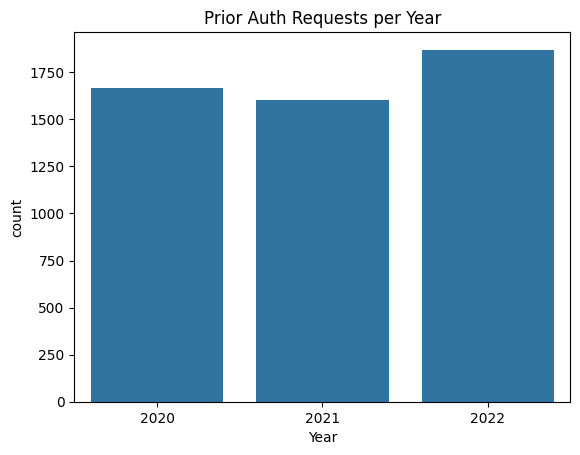

In [10]:
sns.countplot(x='Year',data=df).set(title='Prior Auth Requests per Year')
plt.show()

Observations
* It appears that 2022 had the most prior auth requests followed by 2020 then 2021.
* Does this mean that the number of prior auths are going up? Or does this depend on specific procedures, locations or patients?

## What was the Insurance Carrier with the highest approval rate?

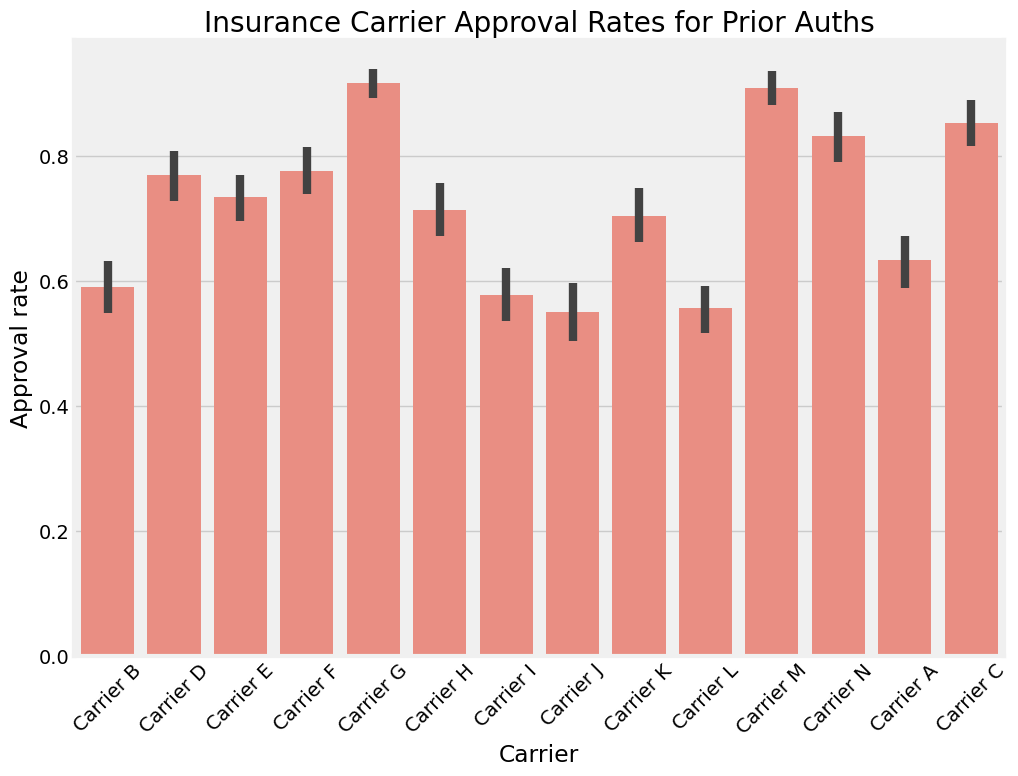

In [11]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
unique_carriers = df['Carrier'].unique()
sns.barplot(x='Carrier',y='Approval rate',data=df,color='salmon',order=unique_carriers)
plt.xticks(rotation=45)
plt.title("Insurance Carrier Approval Rates for Prior Auths")
plt.show();

Observations
* It appears that the top 3 Carriers with the highest approval rates are:
1. Carrier G
2. Carrier M
3. Carrier C
* The Carriers with the lowest approval rate bottom 3 are:
1. Carrier J
2. Carrier L
3. Carrier I

## What Service Category had the highest approval rate?

<ipython-input-12-085d1332424d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Service category',y='Approval rate',data=df,palette="Set3", inner="points", bw_method =.2, cut=2, linewidth=3)


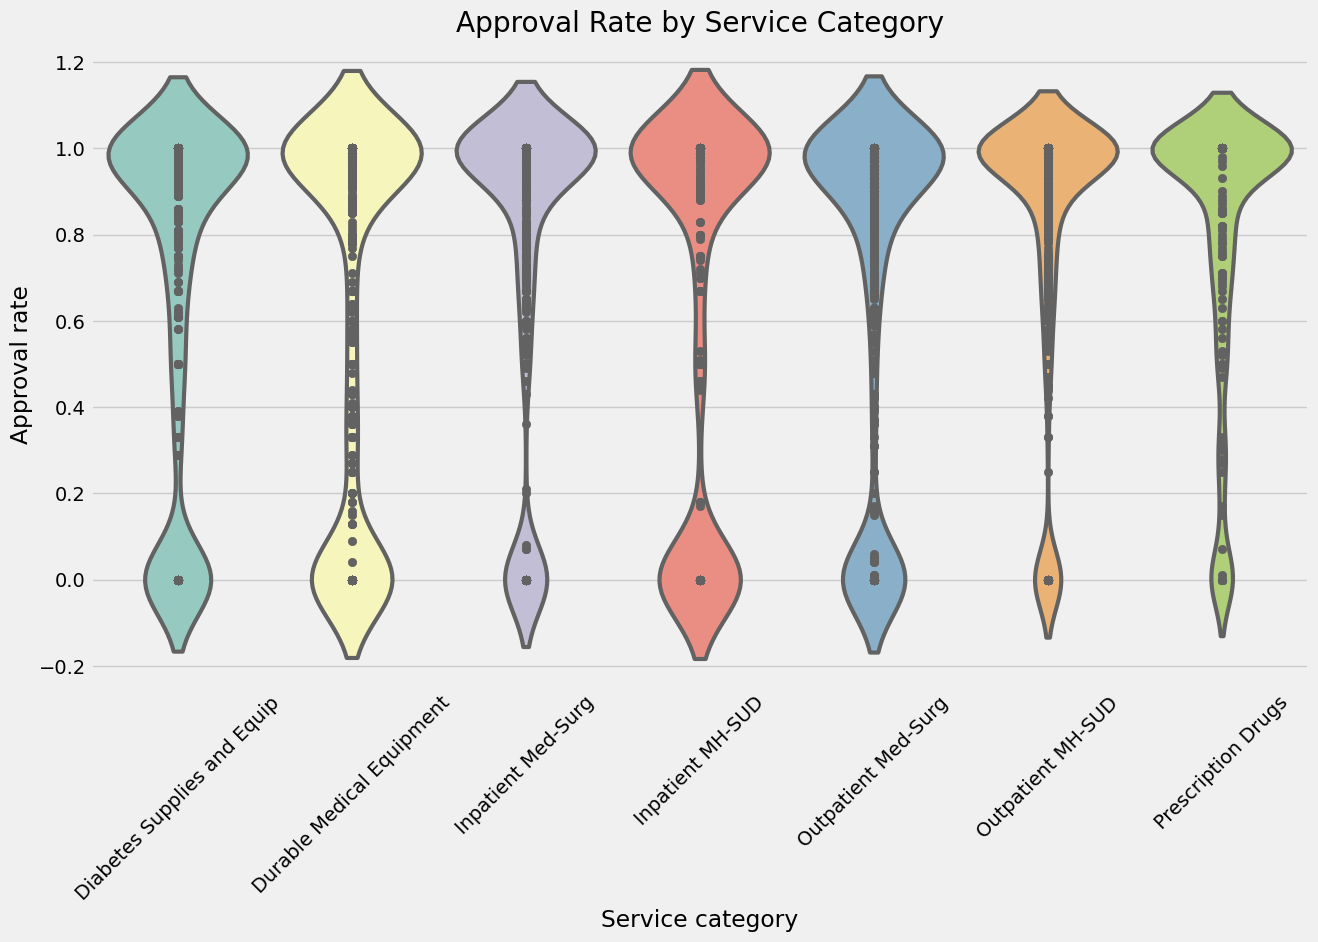

In [12]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Service category',y='Approval rate',data=df,palette="Set3", inner="points", bw_method =.2, cut=2, linewidth=3)
plt.xticks(rotation=45)
plt.title("Approval Rate by Service Category")
plt.show();

Observations
* This is an interesting way to look at the data. But it does tell an interesting story about prior authorizations by Service Category.
* A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots show summary statistics and the density of each variable.
* Prescription Drugs as well as Durable Medical Equipment seem to have a variable distribution of approvals across the board. This does not surprise me. We should look further into these.
* Diabetes Supplies and Equipment seem to have more points in the upper quartile range showing more prior auths are approved than not approved.
* The "Med-Surg" categories all seem to have similar approval rates which is consistent for all, except for Inpatient MH-SUD which seems to have more variability.

## What is the Standard Avg Response time in Days by Code Type?
* We first need to convert the avg response time column to days because according to the file metadata it is in hours.
* Then I did miss 1 error in the data where "cPT" should be "CPT" and I will correct this then plot the data.

In [13]:
## we need to convert hours to days for Standard Average Response time --> 24 hours in a day so x/24 = days
df['Standard - Avg response time'] = df['Standard - Avg response time'].apply(lambda x: x/24)

In [16]:
# we need to replace "cPT" with CPT as this is an error in the data that was found
df['Code type'] = df['Code type'].str.replace('cPT', 'CPT')

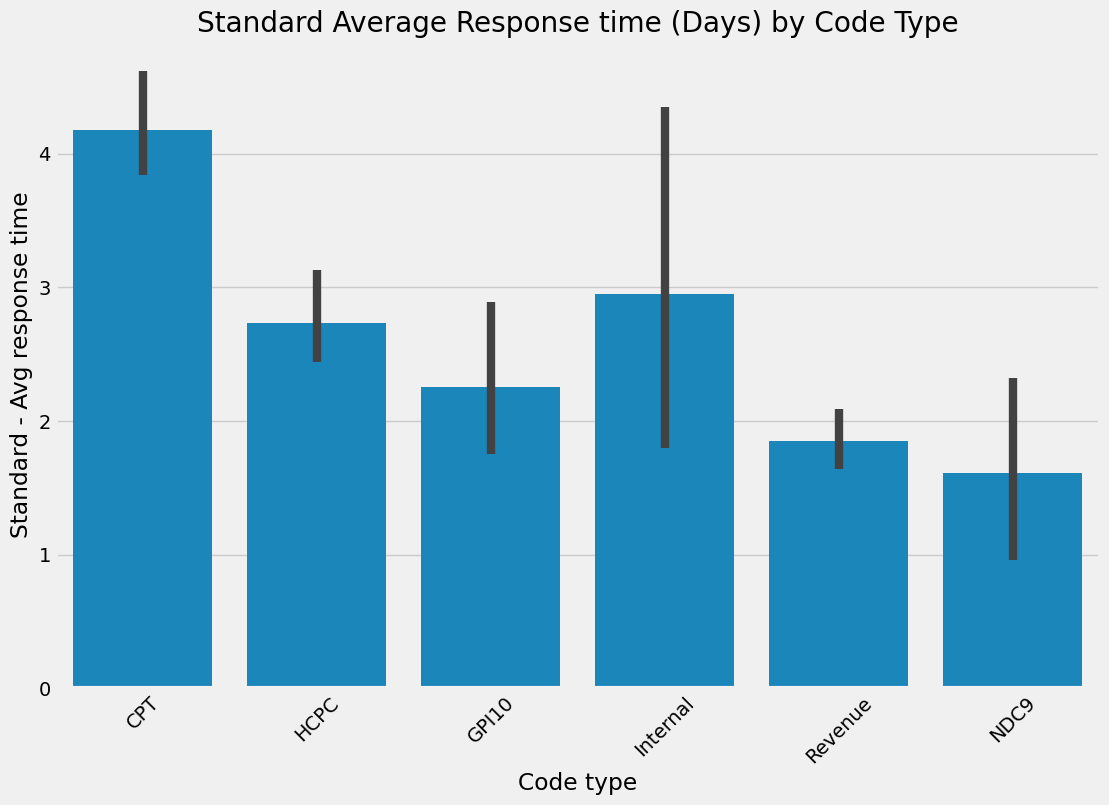

In [38]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# Sort DataFrame by 'Standard - Avg response time'
df_sorted = df.sort_values('Standard - Avg response time',ascending=False)

sns.barplot(x='Code type', y='Standard - Avg response time', data=df_sorted).set(title="Standard Average Response time (Days) by Code Type")
plt.xticks(rotation=45)
plt.show();

Observations
* We can see that that the Standard Avg response time in days is the highest or longest for CPT codes at 4 days, followed by Internal at almost 3 but there is an upper bounds that goes up to 4 in terms of the quartile range.
    * Internal and HCPC codes were next highest avg response time.
* The fastest average response time by code type is NDC9 which are National Drug Codes. This makes sense because these are for prescription drug coverage. Usually if a drug is going to be approved or denied it is immediate as we can see here. It would be interesting to see which drug codes were denied vs. approved sooner.
* The next fastest average response time was for "Revenue" which are codes most often used in hospital billing to classify services and items provided to patients. These codes help determine reimbursement rates for different services.
* Lastly we can see GPI10 codes which are used to identify specific drug products and their therapeutic classes.

In [15]:
df['Code'].value_counts()

Code
E0784     342
124        54
90868      50
128        47
A9276      43
         ... 
21089       1
K0848       1
A4427       1
58210       1
E10.66      1
Name: count, Length: 1248, dtype: int64

## Let's look at Drug Class approval rate

In [20]:
# create a sub df
df_drug = df[df['Code type']=='NDC9']
df_drug.head()

,Index,Carrier,Year,Service category,Request,Code type,Code,Description of service,Number of requests per code,Approval rate,Initially denied then approved - approval rate,Expedited - Avg response time,Standard - Avg response time,Extenuating circumstances - Avg response time,Expedited - Number of requests,Standard - Number of requests,Extenuating circumstances - Number of requests,Drug class,Drug name,Drug code
3770,3771,Carrier C,2022,Prescription Drugs,Codes with the highest total number of prior a...,NDC9,E0784,Alcohol and/or drug services,92.0,0.60,1.0,17.31,2.350000,600.0,16.0,76.0,1.0,DIABETIC THERAPY,OZEMPIC 0.25 OR .5 PEN INJCTR,1694132.0
3771,3772,Carrier C,2022,Prescription Drugs,Codes with the highest total number of prior a...,NDC9,E0784,Alcohol and/or drug services,55.0,0.89,1.0,0.09,3.776667,600.0,10.0,45.0,1.0,DIABETIC THERAPY,OZEMPIC 1/0.75 (3) PEN INJCTR,1694130.0
3772,3773,Carrier C,2022,Prescription Drugs,Codes with the highest total number of prior a...,NDC9,E0784,Alcohol and/or drug services,42.0,0.81,1.0,31.57,2.483333,600.0,14.0,28.0,1.0,NON-OPIOID ANALGESICS,NURTEC ODT 75 MG TAB RAPDIS,726183000.0
3773,3774,Carrier C,2022,Prescription Drugs,Codes with the highest total number of prior a...,NDC9,E0784,Alcohol and/or drug services,35.0,1.00,1.0,0.21,0.005417,600.0,19.0,16.0,1.0,ANTICOAGULANTS,ELIQUIS 5 MG TABLET,30894.0
3774,3775,Carrier C,2022,Prescription Drugs,Codes with the highest total number of prior a...,NDC9,E0784,Alcohol and/or drug services,33.0,0.85,1.0,3.07,6.492917,600.0,9.0,24.0,1.0,Medical Supplies,DEXCOM G6 EACH/DEXCOM G6 SENSOR EACH,86270053.0


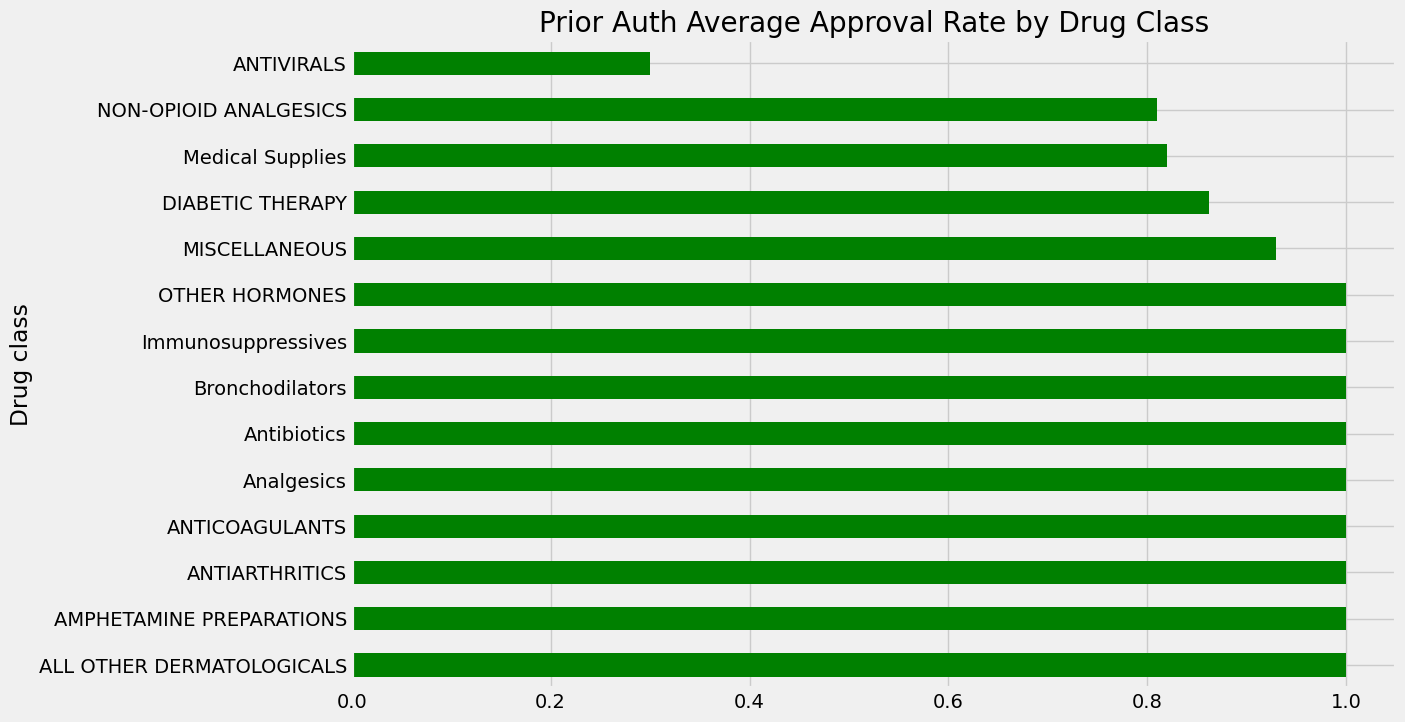

In [36]:
plt.figure(figsize=(12,8))
df_drug.groupby('Drug class')['Approval rate'].mean().sort_values(ascending=False).plot(kind='barh',color='green')
plt.title('Prior Auth Average Approval Rate by Drug Class')
plt.show();

Observations
* The average approval rate is lowest for Antivirals at 0.3. It would be interesting to look and see what these are in the dataset specifically.
* The next group for the average approval rate being lower is at 0.8 for:
1. non opioid analgesics
2. medical supplies
    * This seems to make sense as most of these are probably "over the counter" at the pharmacy and can be bought without insurance approving, but I am sure that most providers try to get it approved first.

* The next group with a lower approval rate is Diabetic therapy at 0.9, obviously this is not terrible as it is 90% but we have to wonder what that 10% that is not getting approved is?
* The rest of the Drug Classes all 100% average approval rate. These appear to be more "urgent" or "emergent" drug classes such as:
* Anticoagulants
* Analgesics
* Antibiotics
* Bronchodilators
* Immunosuppressives

# CPT codes that take the longest for approval?

In [50]:
x_val = pd.DataFrame(df[df['Code type'] == 'CPT'].groupby('Code')['Number of requests per code'].max())
x_val

,Number of requests per code
Code,
0075T,1.0
0296T,71.0
0362T,2.0
0373T,2.0
0402T,17.0
...,...
V2627,2.0
V2628,7.0
Z12.11,2.0


In [53]:
x_val.reset_index()

,Code,Number of requests per code
0,0075T,1.0
1,0296T,71.0
2,0362T,2.0
3,0373T,2.0
4,0402T,17.0
...,...,...
1019,V2627,2.0
1020,V2628,7.0
1021,Z12.11,2.0
1022,Z91.89,1.0


In [68]:
x_val['Number of requests per code'].nlargest(10)

Code
99214    108237.0
93306     32093.0
73721     25161.0
74176     24003.0
MSMPT     21069.0
90837     20864.0
72148     18239.0
70553     15547.0
97110     14314.0
99201     13013.0
Name: Number of requests per code, dtype: float64

<ipython-input-73-771935f557c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of requests per code', y='Code', data=top_10_codes, palette='viridis')


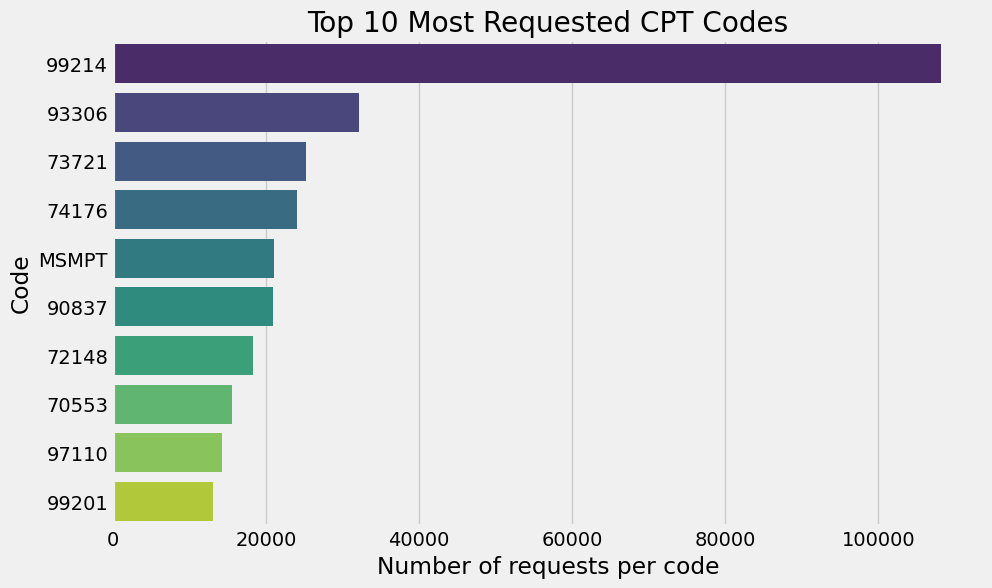

In [73]:
# Sort DataFrame by 'Number of requests per code' in descending order and get the top 10
top_10_codes = x_val.sort_values('Number of requests per code', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of requests per code', y='Code', data=top_10_codes, palette='viridis')
plt.title('Top 10 Most Requested CPT Codes')
plt.show();

Observations
* The top 10 requested codes are actually this according to the AAPC:
1. 99214 - Established patient visit
2. 93306 - New or Established patient
3. 73721 - Diagnostic Radiology (Diagnostic Imaging) Procedures of the Lower Extremities
4. 74176 - Diagnostic Radiology (Diagnostic Imaging) Procedures of the Abdomen
5. MSMPT - multiple sleep latency or maintenance of wakefulness testing, recording, analysis (95805)
6. 90837 - Psychotherapy Services and Procedures
7. 72148 - Diagnostic Radiology (Diagnostic Imaging) Procedures of the Spine and Pelvis
8. 70553 - Diagnostic Radiology (Diagnostic Imaging) Procedures of the Head and Neck
9. 97110 - Physical Medicine and Rehabilitation Therapeutic Procedures
10. 99201 - This code was actually deleted in 2021!
* Source: https://www.aapc.com/codes/cpt-codes-range/

* Overall this makes sense to me because it seems that the most requested CPT codes for prior authorizations generally relate to:
    * Patient office visits
    * Diagnostic radiology testing
    * Therapeutic services

# Lastly, let's look at any correlations in the dataset

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,5144.0,2.572500e+03,1.485089e+03,1.000000,1.286750e+03,2.572500e+03,3.858250e+03,5.144000e+03
Year,5144.0,2.021039e+03,8.286089e-01,2020.000000,2.020000e+03,2.021000e+03,2.022000e+03,2.022000e+03
Number of requests per code,5144.0,2.856476e+02,2.656234e+03,1.000000,2.000000e+00,8.000000e+00,3.900000e+01,1.082370e+05
Approval rate,5144.0,7.042185e-01,4.133619e-01,0.000000,3.675000e-01,9.900000e-01,1.000000e+00,1.000000e+00
Initially denied then approved - approval rate,5144.0,9.210478e-01,2.459337e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Expedited - Avg response time,5144.0,2.331184e+01,2.208056e+01,-195.790000,2.400000e+01,2.400000e+01,2.400000e+01,5.363015e+02
Standard - Avg response time,5144.0,3.643150e+00,1.014937e+01,0.000003,9.966782e-01,1.831250e+00,3.730313e+00,2.646630e+02
Extenuating circumstances - Avg response time,5144.0,5.946170e+02,2.465580e+02,0.020000,6.000000e+02,6.000000e+02,6.000000e+02,5.365358e+03
Expedited - Number of requests,5144.0,3.141155e+01,4.522033e+02,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.368800e+04
Standard - Number of requests,5144.0,1.660428e+02,2.130948e+03,1.000000,1.000000e+00,1.000000e+00,1.200000e+01,9.630200e+04


### Create a correlation dataframe

In [79]:
df_corr = df[['Index','Year', 'Number of requests per code', 'Approval rate', 'Initially denied then approved - approval rate','Expedited - Avg response time','Standard - Avg response time',
              'Extenuating circumstances - Avg response time','Expedited - Number of requests','Standard - Number of requests','Extenuating circumstances - Number of requests','Drug code']]



### Plotting a correlation heatmap

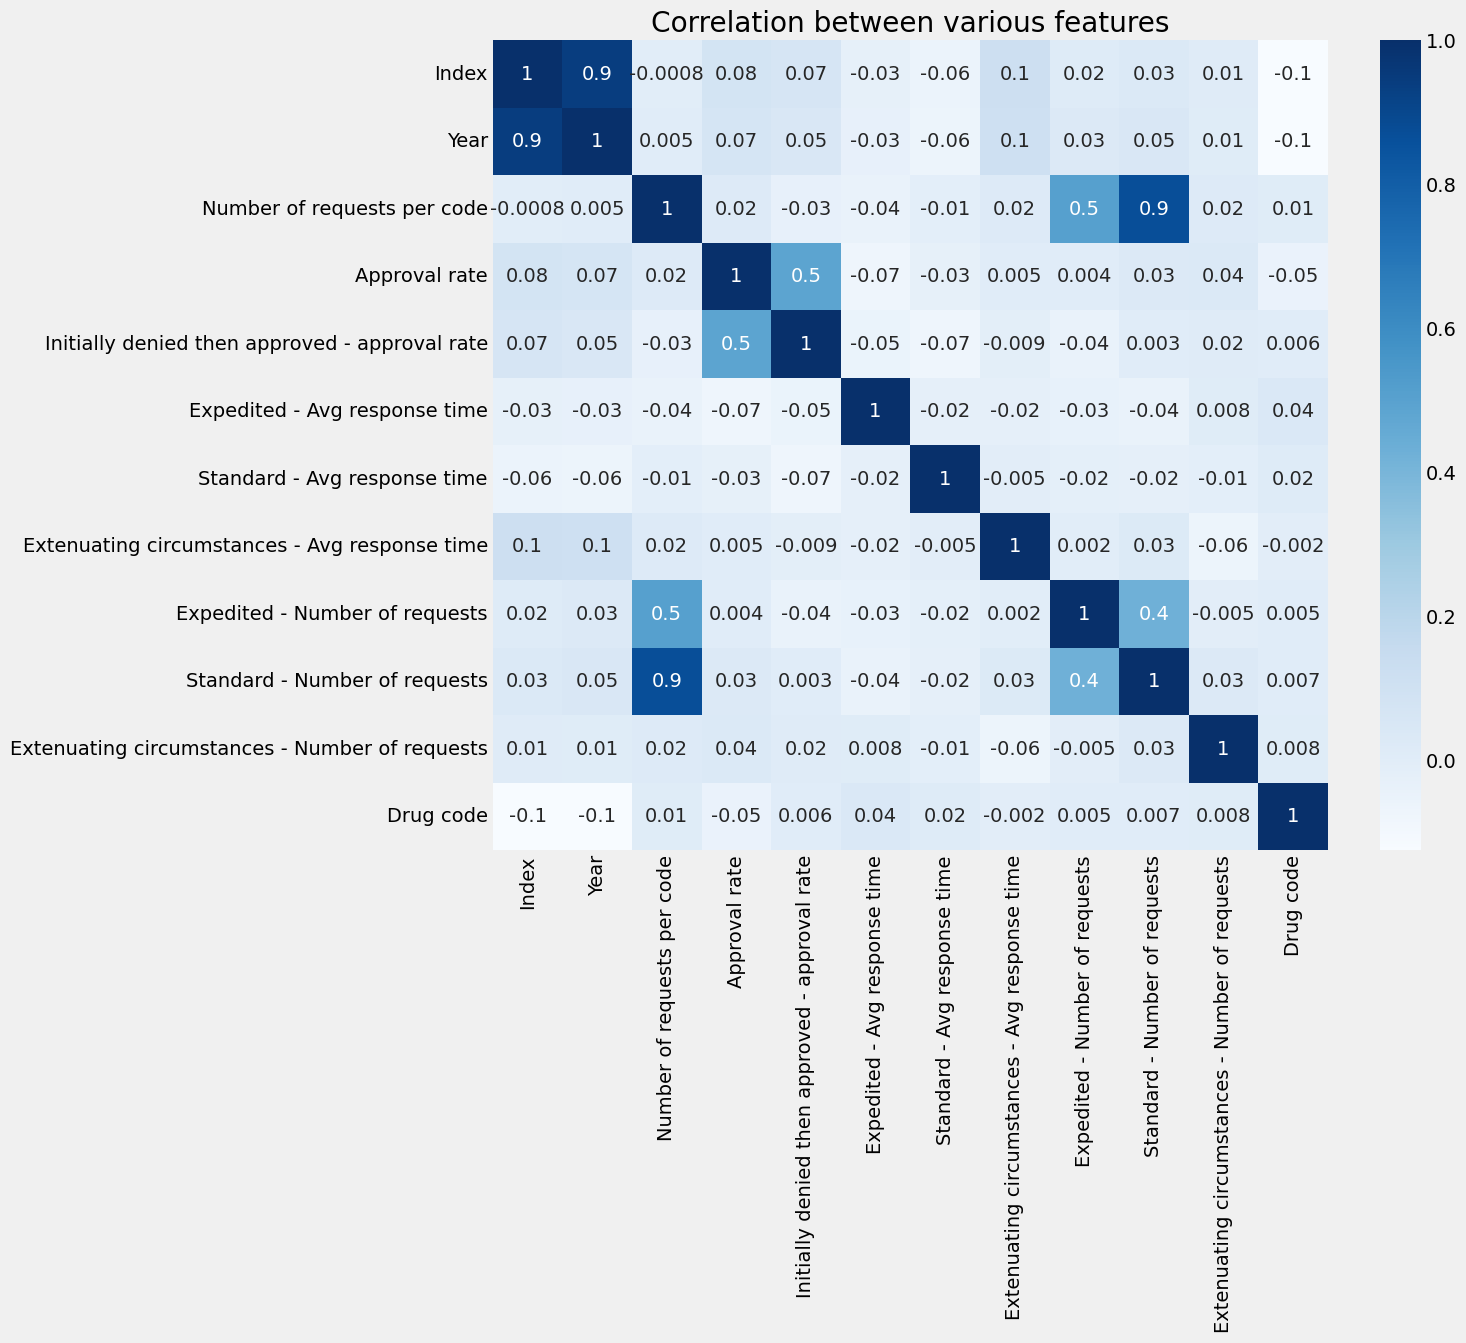

In [80]:
## plot corr heat map
plt.figure(figsize=(12,10))
#print('Correlation between various features')
p=sns.heatmap(df_corr.corr(), annot=True,cmap ='Blues',fmt='.1g').set(title='Correlation between various features')
plt.show();

Observations
* It appears there are strong correlations as follows:
1. Expedited number of requests + number of requests per code => 0.5
2. Standard number of requests + number of requests per code => 0.9
3. Approval rate + initially denied then approved => 0.5

* We can make a few scatterplots and look at this more closely

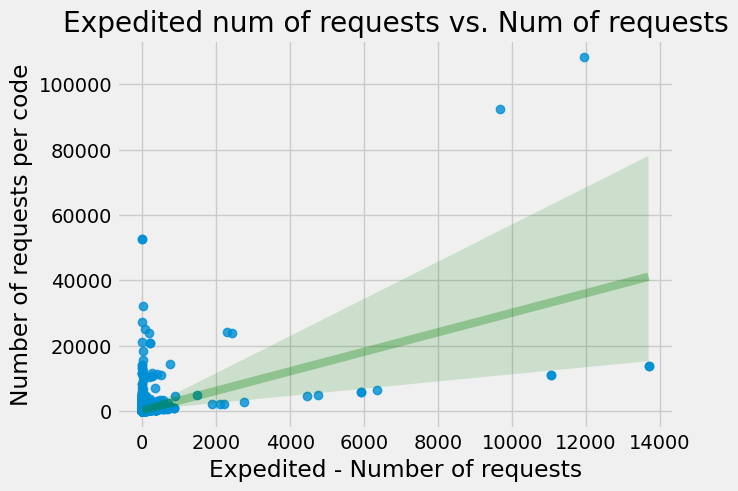

In [91]:
sns.regplot(x='Expedited - Number of requests',y='Number of requests per code',data=df,
            line_kws={
        "color": "g",
        "alpha": 0.3}).set(title='Expedited num of requests vs. Num of requests')
plt.show();

Observations
* I performed a regplot here and we can see a very mild correlation between the expedited number of requests and the number of requests per code. There are a few outliers that show a direct significant correlation.
* But generally speaking we can see at the bottom of the plot that with the increase in expedited num of requests the number of requests per code is less.


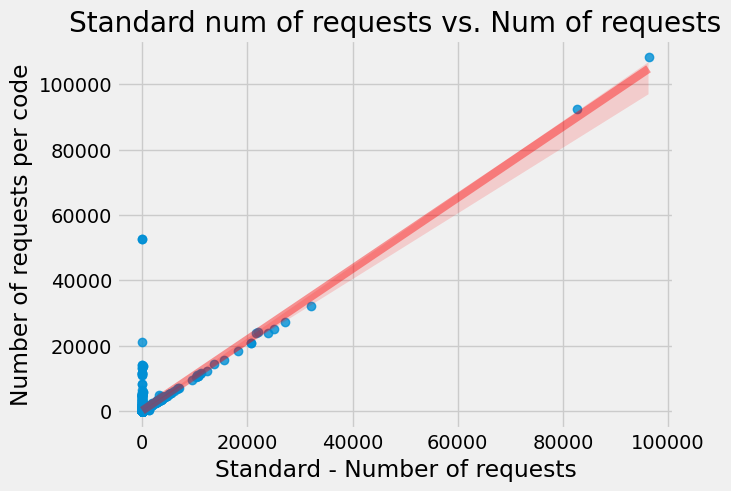

In [94]:
sns.regplot(x='Standard - Number of requests',y='Number of requests per code',data=df,
            line_kws={
        "color": "r",
        "alpha": 0.4
    },).set(title='Standard num of requests vs. Num of requests')
plt.show();

Obsevations
* I performed a regplot here to look at the correlation. It does appear that with the standard number of request increasing there are more requests per code which makes complete sense.

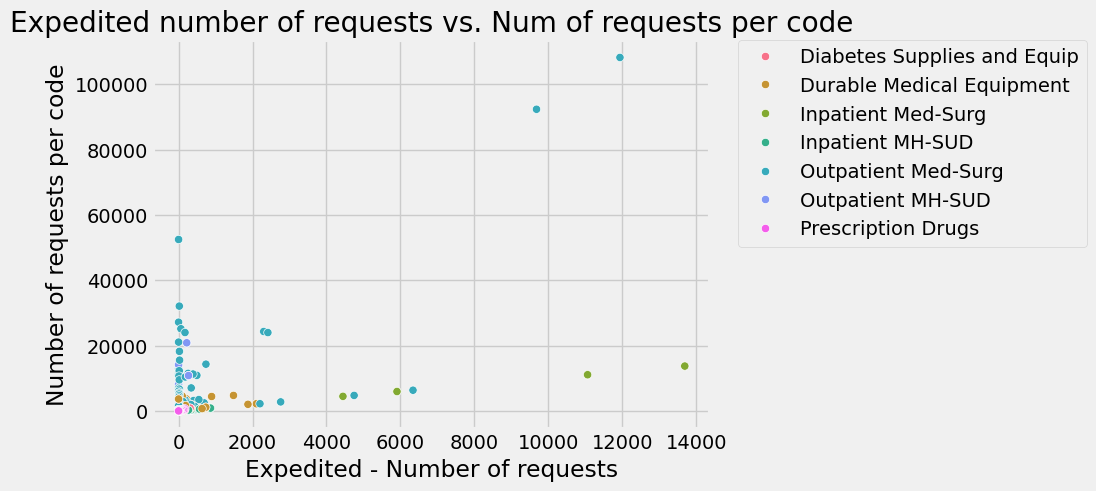

In [100]:
sns.scatterplot(x='Expedited - Number of requests',y='Number of requests per code',data=df,hue='Service category').set(title='Expedited number of requests vs. Num of requests per code')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Observations
* We can see that Outpatient Med-Surg has the highest correlation with number of requests and expedited number of requests, but these seem to be outliers.
* Inpatient Med-Surg seems to have more expedited number of requests but significanty less overall number of requests and this would make sense as inpatient is hospital and more than likely urgent or emergent procedures.
* It does appear that Diabetes supplies, Durable medical equipment, and prescription drugs generally all have less expedited number of requests and less overall prior auth requests.

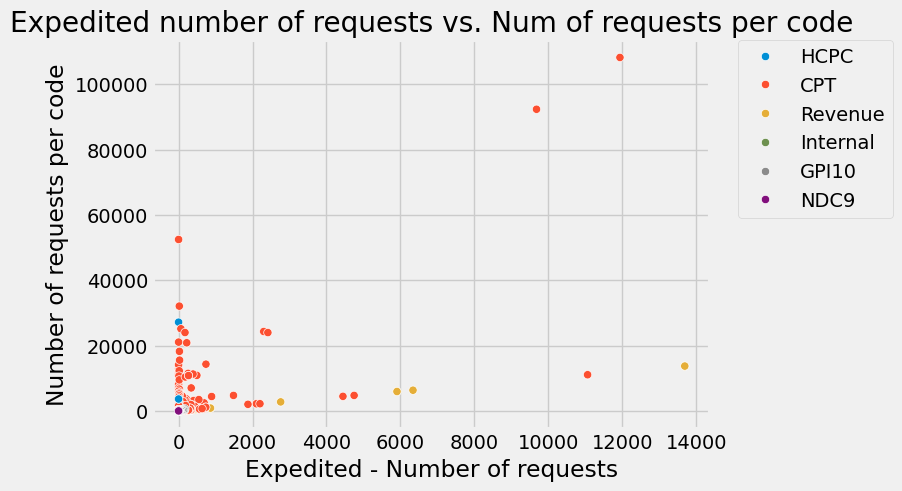

In [101]:
sns.scatterplot(x='Expedited - Number of requests',y='Number of requests per code',data=df,hue='Code type').set(title='Expedited number of requests vs. Num of requests per code')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Observations
* We can see that CPT codes generally have more requests than other code types.
* The number of requests related to expedited number of requests does show a linear relation for CPT codes.
* Along the bottom of the plot we can see less number of requests but more expedited requests for CPT and Revenue or hospital biling codes.

# Summary of Data Storytelling
* We looked at variables in the Washington State Prior Authorization Dataset available from HealthData.gov.
* We saw that the most prior authorizations were in 2022, followed by 2020 then 2021.
* The insurance carriers were classified for the data which makes sense. But we did see that the top 3 carriers with the highest
approval rates were:
		* Carrier G
		* Carrier M
		* Carrier C
* We saw the carriers with the lowest prior auth approval rates were:
		* Carrier J
		* Carrier L
		* Carrier I

* Next we looked at approval rates by service category
	* Generally speaking we saw that Prescription drugs and Durable Medical Equipment had the most variability in their distributions.
	* We also saw that Diabetes supplies/equipment seemed to have more points in the upper quartile range showing more prior auths get
	approved.
	* We also saw that all "Med-Surg" categories have similar consistent approval rates which makes sense

* In terms of average response time in Days for prior auths:
	* It is highest at 4 days or longer for CPT codes
	* The fastest response time is for NDC9 or National Drug Codes. This does make sense as prescription drugs are usually immediately
	approved or denied as soon as a prescription is sent to the pharmacy.
	* Revenue codes were the "next fastest" response time which makes sense as these are related to hospital billing.

* Next we looked at proir auth approval rates by Drug Classes
	* The lowest approval rates were for non opioid analgesics and medical supplies which can usually be purchased over the counter at the pharmacy
	and makes sense that these would be less likely to be approved by an insurance carrier.
	* Diabetic therapies were next "lowest" at 90% which made me wonder what the 10% not getting approved was and this would
	require further analysis.
	* The most interesting finding with 100% approval rates were for more "urgent or emergent" drug clasess such as anticoagulants,
	analgesics, antibiotics, bronchodilators and immunosuppressives.

* The top 10 CPT codes were then examined for which had the most prior authorization requests per code.
	* Without listing all 10, we saw the top 3 were an established patient office visit, new or established patient office visit, and
	diagnostic radiology imaging procedures of the lower extremities and abdomen.

* Lastly, our data storytelling finished by looking at correlations in the data. The Strongest correlations were seen with Standard number
of requests and number of requests per code at 0.9. There were also moderate correlations seen with expedited number of requests and number
of requests per code at 0.5 and also approval rate and initially denied then approved at 0.5.
	* It was interesting to see that generally speaking, CPT codes had more prior auth requests than any other service type and this was not
	directly correlated with the expedited number of requests.
	* There were more expedited requests for CPT and Revenue codes but this usualy occurs with less overall number of requests.

* And finally we saw that Outpatient Med-Surg has the highest correlation with number of requests and expedited number of requests, but these seem to be outliers.
	* Inpatient Med-Surg did seem to have more expedited number of requests but significanty less overall number of requests and this would make sense as inpatient is hospital and more than likely urgent or emergent procedures.
It does appear that Diabetes supplies, Durable medical equipment, and prescription drugs generally all have less expedited number of requests and less overall prior auth requests.

I think we can say that Prior Authorizations are complex and this is only data from Washington State. Certainly this will vary
significantly by State, Insurance Carrier, Medical service type, Code type, and other factors not seen here. This was as quick
look into this data but there is plenty more that can and should be done with this in the future to improve the prior authorization
process for patients and providers.

# References
* Berg, 2023. “What doctors wish patients knew about prior authorization.” Retrieved from: https://healthdata.gov/State/Health-Plan-Prior-Authorization-Data/uwv9-fju9/about_data
* Dataset link: https://healthdata.gov/State/Health-Plan-Prior-Authorization-Data/uwv9-fju9/about_data
* Georgetown University article: https://ccf.georgetown.edu/2023/08/01/medicaid-managed-care-organizations-denials-of-prior-authorization-for-services/
* Related github site: https://github.com/domagal9/classifymymeds


